# Underfitting vs. Overfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import  metrics
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Rozważmy następujący zbiór punktów:

In [2]:
np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
print(len(y))

print('X =',X)
print('y =',y)

30
X = [0.0202184  0.07103606 0.0871293  0.11827443 0.14335329 0.38344152
 0.41466194 0.4236548  0.43758721 0.46147936 0.52184832 0.52889492
 0.54488318 0.5488135  0.56804456 0.60276338 0.63992102 0.64589411
 0.71518937 0.77815675 0.78052918 0.79172504 0.79915856 0.83261985
 0.87001215 0.891773   0.92559664 0.94466892 0.96366276 0.97861834]
y = [ 1.0819082   0.87027612  1.14386208  0.70322051  0.78494746 -0.25265944
 -0.22066063 -0.26595867 -0.4562644  -0.53001927 -0.86481449 -0.99462675
 -0.87458603 -0.83407054 -0.77090649 -0.83476183 -1.03080067 -1.02544303
 -1.0788268  -1.00713288 -1.03009698 -0.63623922 -0.86230652 -0.75328767
 -0.70023795 -0.41043495 -0.50486767 -0.27907117 -0.25994628 -0.06189804]


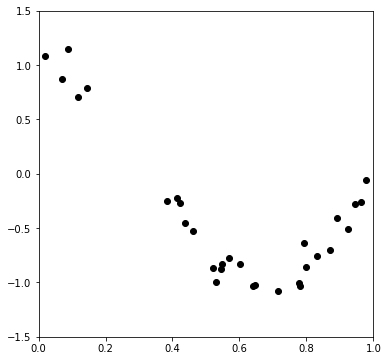

In [3]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X, y,  color='black')
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Podziel dane na dwie grupy.

s = [0.19658236 0.36872517 0.82099323 0.09710128 0.83794491 0.09609841
 0.97645947 0.4686512  0.97676109 0.60484552 0.73926358 0.03918779
 0.28280696 0.12019656 0.2961402  0.11872772 0.31798318 0.41426299
 0.0641475  0.69247212 0.56660145 0.26538949 0.52324805 0.09394051
 0.5759465  0.9292962  0.31856895 0.66741038 0.13179786 0.7163272 ]
s = [0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1.]
X = [0.0202184  0.07103606 0.0871293  0.11827443 0.14335329 0.38344152
 0.41466194 0.4236548  0.43758721 0.46147936 0.52184832 0.52889492
 0.54488318 0.5488135  0.56804456 0.60276338 0.63992102 0.64589411
 0.71518937 0.77815675 0.78052918 0.79172504 0.79915856 0.83261985
 0.87001215 0.891773   0.92559664 0.94466892 0.96366276 0.97861834]
y = [ 1.0819082   0.87027612  1.14386208  0.70322051  0.78494746 -0.25265944
 -0.22066063 -0.26595867 -0.4562644  -0.53001927 -0.86481449 -0.99462675
 -0.87458603 -0.83407054 -0.77090649 -0.83476183 -1.03080067 -1.02544303


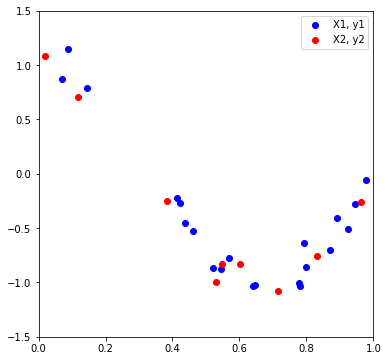

In [4]:
s=np.random.random_sample(n_samples)
print('s =',s)

s[s>0.2]=1
s[s<=0.2]=0
print('s =',s)

X1=X[s==1]
X2=X[s==0]
y1=y[s==1]
y2=y[s==0]

print('X =',X)
print('y =',y)

print('X1 =',X1)
print('y1 =',y1)
print('X2 =',X2)
print('y2 =',y2)

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue', label='X1, y1')
plt.scatter(X2, y2,  color='red', label='X2, y2')
x_tr = np.linspace(0, 1, 200)    # definiujemy dane treningowe?
plt.legend()
plt.show()

# Zadanie
Wykonaj regresję:
* liniową


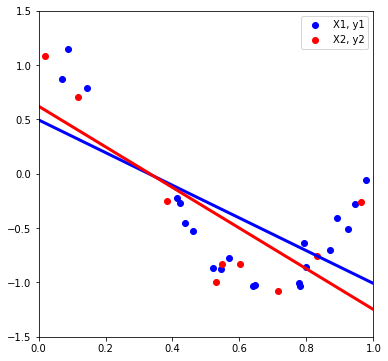

In [5]:
X1=np.vstack(X1)
X2=np.vstack(X2)

model1 = linear_model.LinearRegression()
model1.fit(X1, y1)

model2 = linear_model.LinearRegression()
model2.fit(X2, y2)

plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue', label='X1, y1')
plt.scatter(X2, y2,  color='red', label='X2, y2')
plt.plot(x_tr, model1.predict(np.vstack(x_tr)), color='blue',linewidth=3)
plt.plot(x_tr, model2.predict(np.vstack(x_tr)), color='red',linewidth=3)
plt.legend()
plt.show()

In [6]:
# Sprawdzamy który model lepszy? model1 czy model2?
print('R2 - model1(niebieski): ',metrics.r2_score(np.vstack(y2), model1.predict(np.vstack(X2))))
print('R2 - model2(czerwony): ',metrics.r2_score(np.vstack(y1), model2.predict(np.vstack(X1))))

R2 - model1(niebieski):  0.5364040259778571
R2 - model2(czerwony):  0.3817285231796742


In [7]:
# w rozwiązaniu Przemka jeszcze jakaś pętla - badanie 100 próbek

# Zadanie
Wykonaj regresję:
* wielomianową stopnia $4$


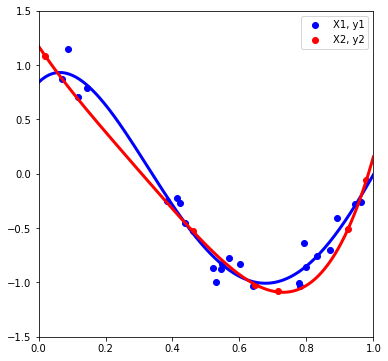

In [17]:
X1=np.vstack(X1)
X2=np.vstack(X2)

model3 = make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression())
model3.fit(X1, y1)

model4 = make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression())
model4.fit(X2, y2)

plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
# plt.scatter(X, y,  color='black')
plt.scatter(X1, y1,  color='blue', label='X1, y1')
plt.scatter(X2, y2,  color='red', label='X2, y2')
plt.plot(np.vstack(x_tr), model3.predict(np.vstack(x_tr)), color='blue',linewidth=3)
plt.plot(np.vstack(x_tr), model4.predict(np.vstack(x_tr)), color='red',linewidth=3)
plt.legend()
plt.show()

# wg rozwiązania Przemka miał wyjść inny wykres 

In [9]:
# Sprawdzamy który model lepszy? model3 czy model4?
print('R2 - model3(niebieski): ',metrics.r2_score(np.vstack(y2), model3.predict(np.vstack(X2))))
print('R2 - model4(czerwony): ',metrics.r2_score(np.vstack(y1), model4.predict(np.vstack(X1))))

R2 - model3(niebieski):  0.9613644731745898
R2 - model4(czerwony):  0.9512286749875039


In [10]:
r2_list = []
mse_list = []
for i in range(100):
    s=np.random.random_sample(n_samples)
    s[s>0.2]=1
    s[s<=0.2]=0
    s
    X1=X[s==1]
    y1=y[s==1]
    X2=X[s==0]
    y2=y[s==0]
    
    model1 = LinearRegression()
    model1.fit(np.vstack(X1), y1)

    model2 = LinearRegression()
    model2.fit(np.vstack(X2), y2)
    
    r2_list.append(metrics.r2_score(np.vstack(y2), model1.predict(np.vstack(X2))))
    r2_list.append(metrics.r2_score(np.vstack(y1), model2.predict(np.vstack(X1))))

    mse_list.append(metrics.mean_squared_error(np.vstack(y2), model1.predict(np.vstack(X2))))
    mse_list.append(metrics.mean_squared_error(np.vstack(y1), model2.predict(np.vstack(X1))))


r2_list_1 = []
mse_list_1 = []
for i in range(100):
    s=np.random.random_sample(n_samples)
    s[s>0.2]=1
    s[s<=0.2]=0
    s
    X1=X[s==1]
    y1=y[s==1]
    X2=X[s==0]
    y2=y[s==0]
    
    model1 = make_pipeline(PolynomialFeatures(4), LinearRegression())
    model1.fit(np.vstack(X1), y1)

    model2 = make_pipeline(PolynomialFeatures(4), LinearRegression())
    model2.fit(np.vstack(X2), y2)
    
    r2_list_1.append(metrics.r2_score(np.vstack(y2), model1.predict(np.vstack(X2))))
    r2_list_1.append(metrics.r2_score(np.vstack(y1), model2.predict(np.vstack(X1))))
    
    mse_list_1.append(metrics.mean_squared_error(np.vstack(y2), model1.predict(np.vstack(X2))))
    mse_list_1.append(metrics.mean_squared_error(np.vstack(y1), model2.predict(np.vstack(X1))))

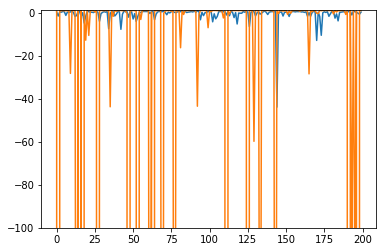

In [11]:
plt.plot(r2_list)
plt.plot(r2_list_1)
# plt.plot(r2_list_2, alpha=0.2)
plt.ylim(-100,1)
plt.show()

# porównanie R2 dla regresji liniowej i wielomianu st. 4

# Zadanie
Wykonaj regresję:
* wielomianową stopnia $15$


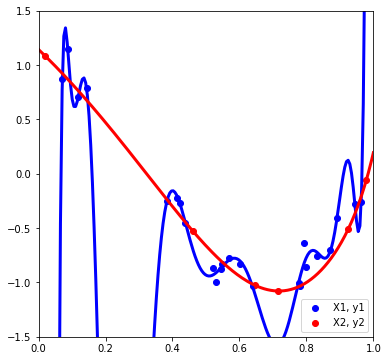

In [13]:
X1=np.vstack(X1)
X2=np.vstack(X2)

model5 = make_pipeline(PolynomialFeatures(15), linear_model.LinearRegression())
model5.fit(X1, y1)

model6 = make_pipeline(PolynomialFeatures(15), linear_model.LinearRegression())
model6.fit(X2, y2)

plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue', label='X1, y1')
plt.scatter(X2, y2,  color='red', label='X2, y2')
plt.plot(x_tr, model5.predict(np.vstack(x_tr)), color='blue',linewidth=3)
plt.plot(x_tr, model6.predict(np.vstack(x_tr)), color='red',linewidth=3)
plt.legend()
plt.show()


In [ ]:
# Sprawdzamy który model lepszy? model3 czy model4?
print('R2 - model5(niebieski): ',metrics.r2_score(np.vstack(y2), model5.predict(np.vstack(X2))))
print('R2 - model6(czerwony): ',metrics.r2_score(np.vstack(y1), model6.predict(np.vstack(X1))))

Najlepsze R2 dla modelu 5 - najbliżej 1